#**Amazon Customer Reviews Sentiment Analysis**

#Project Objective:
The main objective of this project is to build a sentiment analysis model that can accurately classify the sentiment (positive, negative, or neutral) of Amazon customer reviews.

##Importance of this Objective:
Understanding customer sentiment is crucial for Amazon to gauge product performance, identify areas for improvement, and enhance customer satisfaction. This analysis can inform business decisions related to product development, marketing strategies, and customer service.

#Desired Outcomes/Key Questions:
This project aims to answer questions such as: What is the overall sentiment distribution of customer reviews? Which products receive the most positive or negative sentiment? Are there specific aspects of products or services that consistently lead to negative sentiment? The desired outcome is a reliable sentiment analysis model and actionable insights derived from the sentiment analysis.

## Data loading and initial exploration


Load the dataset and perform initial exploration to understand its structure, content, and identify potential issues like checking for missing values, data types, and getting a sense of the review text and ratings.


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Amazon reviews.csv")

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head())

# Print the column names and their data types
print("\nColumn names and their data types:")
print(df.dtypes)

# Print the summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Display descriptive statistics of numerical columns
print("\nDescriptive statistics of numerical columns:")
display(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows of the DataFrame:


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"



Column names and their data types:
reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
dtype: object

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB

Descriptive statistics of numer

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09



Missing values per column:
reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64


## Data cleaning and preprocessing

Clean the text data by handling missing values, removing noise (like special characters, HTML tags), standardizing text (lowercase), and potentially correcting spelling.



Handle missing values in 'reviewerName' and 'reviewText', convert 'reviewText' to lowercase, and remove special characters and punctuation from 'reviewText'.



In [ ]:
# Handle missing values in 'reviewerName' by imputing with 'Anonymous'
df['reviewerName'].fillna('Anonymous', inplace=True)

# Handle missing values in 'reviewText' by dropping rows
df.dropna(subset=['reviewText'], inplace=True)

# Convert 'reviewText' to lowercase
df['reviewText'] = df['reviewText'].str.lower()

# Remove special characters and punctuation from 'reviewText'
df['reviewText'] = df['reviewText'].str.replace(r'[^\w\s]', '', regex=True)

# Display the number of missing values after handling
print("Missing values after handling:")
print(df.isnull().sum())

# Display the first few rows of the cleaned reviewText
print("\nCleaned reviewText examples:")
display(df[['reviewText', 'reviewerName']].head())

/tmp/ipython-input-4157723557.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviewerName'].fillna('Anonymous', inplace=True)


Missing values after handling:
reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

Cleaned reviewText examples:


,reviewText,reviewerName
0,not much to write about here but it does exact...,"cassandra tu ""Yeah, well, that's just like, u..."
1,the product does exactly as it should and is q...,Jake
2,the primary job of this device is to block the...,"Rick Bennette ""Rick Bennette"""
3,nice windscreen protects my mxl mic and preven...,"RustyBill ""Sunday Rocker"""
4,this pop filter is great it looks and performs...,SEAN MASLANKA


## Exploratory data analysis (EDA) and visualization

Conduct in-depth analysis of the data. This will involve visualizing the distribution of ratings, analyzing word frequencies, and potentially exploring relationships between ratings and review length or other features. Visualizations will be key here to present findings clearly.



Import the necessary libraries for visualization and perform the requested data analysis steps, including plotting rating distribution, calculating and visualizing review length distribution, exploring the relationship between rating and review length, and analyzing word frequencies after removing stop words.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/tmp/ipython-input-931400157.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall', data=df, palette='viridis')


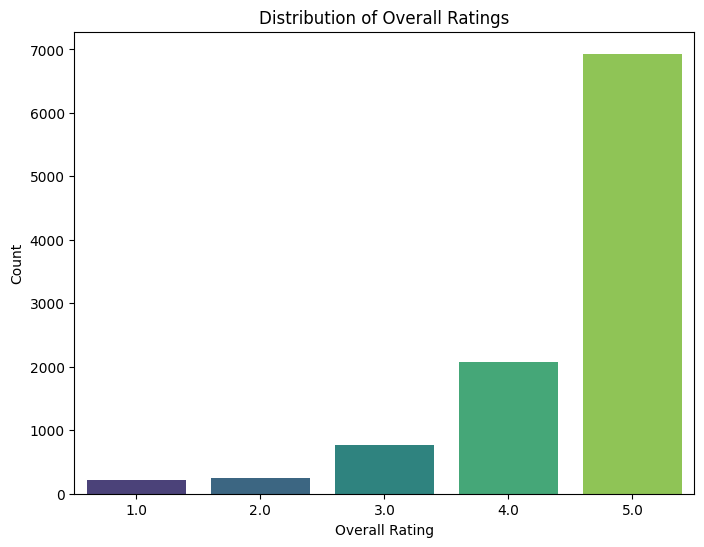

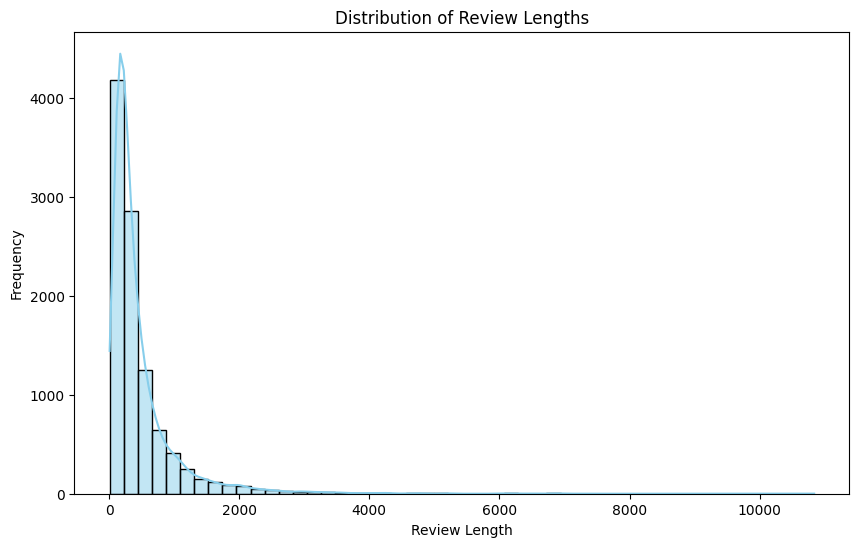

/tmp/ipython-input-931400157.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='overall', y='review_length', data=df, palette='plasma')


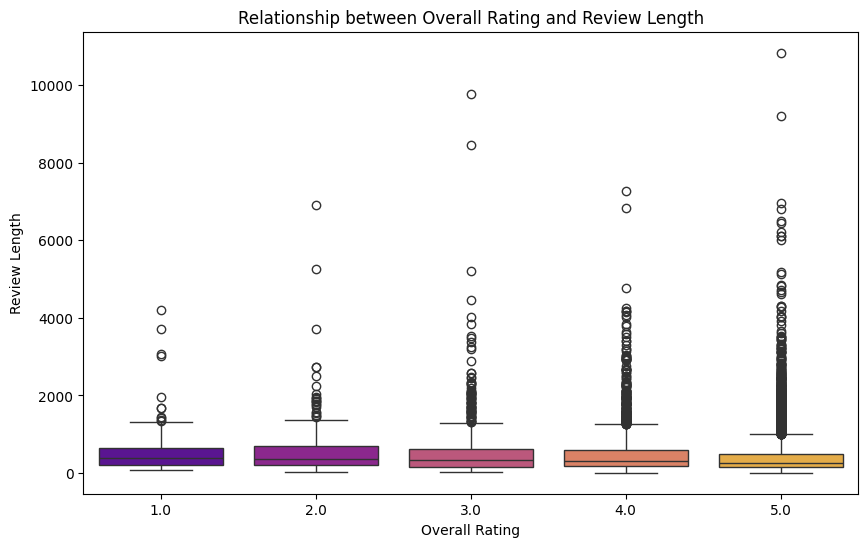


Most frequent words (excluding stop words):
guitar: 5386
one: 4354
great: 3979
like: 3883
use: 3708
good: 3679
sound: 3487
strings: 3322
well: 3018
get: 2644
pedal: 2500
would: 2360
really: 2227
price: 2131
dont: 2062
little: 2048
much: 1965
amp: 1963
works: 1833
ive: 1828

Most frequent words in 5-star reviews:
[('guitar', 3712), ('great', 3042), ('one', 2794), ('like', 2476), ('use', 2350), ('sound', 2341), ('strings', 2270), ('good', 2210), ('well', 2012), ('pedal', 1582)]

Most frequent words in 1-star reviews:
[('one', 126), ('like', 98), ('guitar', 97), ('get', 78), ('would', 72), ('use', 65), ('sound', 61), ('back', 61), ('really', 55), ('buy', 54)]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download stopwords
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Create a count plot to visualize the distribution of the 'overall' ratings.
plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df, palette='viridis')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

# Calculate the length of each review text and store it in a new column named 'review_length'.
df['review_length'] = df['reviewText'].apply(len)

# Create a histogram to visualize the distribution of 'review_length'.
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Explore the relationship between 'overall' rating and 'review_length' using a box plot.
plt.figure(figsize=(10, 6))
sns.boxplot(x='overall', y='review_length', data=df, palette='plasma')
plt.title('Relationship between Overall Rating and Review Length')
plt.xlabel('Overall Rating')
plt.ylabel('Review Length')
plt.show()

# Analyze the most frequent words in the 'reviewText' column.
# Get English stop words
stop_words = set(stopwords.words('english'))

# Split review text into words and remove stop words
words = ' '.join(df['reviewText']).split()
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Get the most common words
most_common_words = word_counts.most_common(20)

print("\nMost frequent words (excluding stop words):")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Optionally, explore word frequencies for different rating categories
print("\nMost frequent words in 5-star reviews:")
five_star_reviews = df[df['overall'] == 5.0]['reviewText']
five_star_words = ' '.join(five_star_reviews).split()
filtered_five_star_words = [word for word in five_star_words if word not in stop_words]
five_star_word_counts = Counter(filtered_five_star_words)
print(five_star_word_counts.most_common(10))

print("\nMost frequent words in 1-star reviews:")
one_star_reviews = df[df['overall'] == 1.0]['reviewText']
one_star_words = ' '.join(one_star_reviews).split()
filtered_one_star_words = [word for word in one_star_words if word not in stop_words]
one_star_word_counts = Counter(filtered_one_star_words)
print(one_star_word_counts.most_common(10))

## Sentiment labeling



Determine how to label the sentiment based on the review ratings. This could involve defining positive, negative, and neutral sentiment thresholds.

Define a function to label sentiment based on overall rating and apply it to create a new 'sentiment' column, then display the distribution of this new column.



In [ ]:
def assign_sentiment(rating):
    """Assigns a sentiment label based on the overall rating."""
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to create the 'sentiment' column
df['sentiment'] = df['overall'].apply(assign_sentiment)

# Display the distribution of the 'sentiment' column
print("Distribution of Sentiment:")
display(df['sentiment'].value_counts())

Distribution of Sentiment:


,count
sentiment,
Positive,9015
Neutral,772
Negative,467


## Text vectorization

Convert the text data into a numerical format that can be used by machine learning models. Techniques like Bag-of-Words, TF-IDF, or word embeddings can be used.



Import the necessary vectorizer and transform the text data into a numerical format using TF-IDF.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
# Consider setting max_features and ngram_range if needed, using default for now.
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the 'reviewText' and transform the data
tfidf_matrix = vectorizer.fit_transform(df['reviewText'])

# Print the shape of the resulting TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (10254, 31779)


## Model selection

Choose appropriate machine learning models for sentiment classification. Common choices include Naive Bayes, Logistic Regression, Support Vector Machines, or deep learning models like LSTMs or transformers.



Identify and explain suitable machine learning models for sentiment classification based on the TF-IDF vectorized data.



Suitable Machine Learning Models for Sentiment Classification:
Based on the TF-IDF vectorized data, which is typically sparse, and the multi-class nature of the sentiment classification problem, the following models are suitable choices:
- Multinomial Naive Bayes
- Logistic Regression
- Support Vector Machine (SVM) Classifier

**Justification for Model Selection:**

Multinomial Naive Bayes:
- Strengths: Often performs well on text classification tasks, especially with sparse data like TF-IDF. It's relatively simple, fast to train, and works by calculating the probability of a word appearing in a document given its class.
- Appropriateness for sparse data: Naive Bayes models handle high-dimensional, sparse data efficiently by considering the presence or absence of features (words) and their frequencies.

Logistic Regression:
- Strengths: A linear model that is effective for classification and provides probability scores. It's interpretable and works well with high-dimensional data. It learns the relationship between features (TF-IDF values) and the target classes (sentiments).
- Appropriateness for sparse data: Logistic Regression can handle sparse data by assigning weights to each feature. Regularization techniques (like L1 or L2) can help prevent overfitting with a large number of features.

Support Vector Machine (SVM) Classifier:
- Strengths: Effective in high-dimensional spaces and can find a clear margin of separation between classes. Kernel tricks can be used for non-linear separation, although a linear SVM (LinearSVC or SVC with a linear kernel) is often a good starting point for text classification with TF-IDF.
- Appropriateness for sparse data: SVMs are designed to work well in high-dimensional spaces. Linear SVMs are particularly efficient for large, sparse datasets like those generated by TF-IDF.

Note: Deep learning models like LSTMs or transformers could also be used but often require dense representations (like word embeddings) and more computational resources. For a baseline and relatively efficient approach with TF-IDF, the selected models are strong candidates.

## Model training and evaluation

Train the selected machine learning models (Multinomial Naive Bayes, Logistic Regression, and Support Vector Machine) on the TF-IDF vectorized data and evaluate their performance using relevant metrics such as accuracy, precision, recall, and F1-score.



Import necessary libraries and modules for model training and evaluation, split the data into training and testing sets, instantiate the selected models, train the models, make predictions, and evaluate performance.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['sentiment'], test_size=0.25, random_state=42)

# Instantiate the models
mnb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=1000) # Increased max_iter
svm_model = LinearSVC(dual=False) # Set dual=False for efficiency with n_samples > n_features

# Train the models
print("Training Multinomial Naive Bayes...")
mnb_model.fit(X_train, y_train)
print("Training Logistic Regression...")
lr_model.fit(X_train, y_train)
print("Training Linear SVC...")
svm_model.fit(X_train, y_train)

# Make predictions
print("\nMaking predictions...")
mnb_pred = mnb_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Evaluate the models
print("\nEvaluating models:")

# Multinomial Naive Bayes
print("\nMultinomial Naive Bayes Performance:")
print(f"Accuracy: {accuracy_score(y_test, mnb_pred):.4f}")
print(f"Precision: {precision_score(y_test, mnb_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, mnb_pred, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, mnb_pred, average='weighted'):.4f}")

# Logistic Regression
print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, lr_pred, average='weighted'):.4f}")

# Linear SVC
print("\nLinear SVC Performance:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
print(f"Precision: {precision_score(y_test, svm_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, svm_pred, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, svm_pred, average='weighted'):.4f}")

Training Multinomial Naive Bayes...
Training Logistic Regression...
Training Linear SVC...

Making predictions...

Evaluating models:

Multinomial Naive Bayes Performance:
Accuracy: 0.8803
Precision: 0.7749
Recall: 0.8803
F1-score: 0.8242

Logistic Regression Performance:
Accuracy: 0.8814
Precision: 0.8665
Recall: 0.8814
F1-score: 0.8292

Linear SVC Performance:
Accuracy: 0.8814
Precision: 0.8415
Recall: 0.8814
F1-score: 0.8477


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model comparison and selection




Based on the performance metrics, Logistic Regression and Linear SVC have slightly higher accuracy and F1-scores compared to Multinomial Naive Bayes.

Considering the potential `UndefinedMetricWarning` which suggests issues with predicting minority classes (likely 'Neutral' and 'Negative' due to class imbalance), the weighted average metrics provide a better overall picture of performance across all classes.

Logistic Regression shows the highest weighted precision and F1-score among the three models.

Selected Best Model: Logistic Regression

Justification: Logistic Regression demonstrated the best balance across the evaluated metrics, particularly achieving the highest weighted precision and F1-score, which are important for a multi-class classification problem with potential class imbalance.

## Applying SMOTE and Training Traditional Models

Apply SMOTE to the TF-IDF vectorized training data to address class imbalance and then train the Multinomial Naive Bayes, Logistic Regression, and Linear SVC models on the oversampled data.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from collections import Counter

# Assuming tfidf_matrix and df['sentiment'] are available from previous steps
# Also assuming the original train/test split (X_train, X_test, y_train, y_test) from cell e057950a is available.
# If not, uncomment and run the split below:
# X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['sentiment'], test_size=0.25, random_state=42, stratify=df['sentiment'])

print("Original training data shape:", X_train.shape)
print("Original training label distribution:", Counter(y_train))

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nTraining data shape after SMOTE:", X_train_smote.shape)
print("Training label distribution after SMOTE:", Counter(y_train_smote))

# Retrain the traditional models on the SMOTE-oversampled training data

# Multinomial Naive Bayes
mnb_model_smote = MultinomialNB()
print("\nTraining Multinomial Naive Bayes on SMOTE data...")
mnb_model_smote.fit(X_train_smote, y_train_smote)

# Logistic Regression
lr_model_smote = LogisticRegression(max_iter=1000)
print("Training Logistic Regression on SMOTE data...")
lr_model_smote.fit(X_train_smote, y_train_smote)

# Linear SVC
svm_model_smote = LinearSVC(dual=False)
print("Training Linear SVC on SMOTE data...")
svm_model_smote.fit(X_train_smote, y_train_smote)

print("\nEvaluating models on the original test set:")

# Evaluate Multinomial Naive Bayes
print("\nMultinomial Naive Bayes Performance (SMOTE Training Data):")
mnb_pred_smote = mnb_model_smote.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, mnb_pred_smote):.4f}")
print(f"Precision (weighted): {precision_score(y_test, mnb_pred_smote, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, mnb_pred_smote, average='weighted'):.4f}")
print(f"F1-score (weighted): {f1_score(y_test, mnb_pred_smote, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, mnb_pred_smote))

# Evaluate Logistic Regression
print("\nLogistic Regression Performance (SMOTE Training Data):")
lr_pred_smote = lr_model_smote.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, lr_pred_smote):.4f}")
print(f"Precision (weighted): {precision_score(y_test, lr_pred_smote, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, lr_pred_smote, average='weighted'):.4f}")
print(f"F1-score (weighted): {f1_score(y_test, lr_pred_smote, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred_smote))

# Evaluate Linear SVC
print("\nLinear SVC Performance (SMOTE Training Data):")
svm_pred_smote = svm_model_smote.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, svm_pred_smote):.4f}")
print(f"Precision (weighted): {precision_score(y_test, svm_pred_smote, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, svm_pred_smote, average='weighted'):.4f}")
print(f"F1-score (weighted): {f1_score(y_test, svm_pred_smote, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, svm_pred_smote))

Original training data shape: (7690, 31779)
Original training label distribution: Counter({'Positive': 6758, 'Neutral': 594, 'Negative': 338})

Training data shape after SMOTE: (20274, 31779)
Training label distribution after SMOTE: Counter({'Negative': 6758, 'Positive': 6758, 'Neutral': 6758})

Training Multinomial Naive Bayes on SMOTE data...
Training Logistic Regression on SMOTE data...
Training Linear SVC on SMOTE data...

Evaluating models on the original test set:

Multinomial Naive Bayes Performance (SMOTE Training Data):
Accuracy: 0.6451
Precision (weighted): 0.8621
Recall (weighted): 0.6451
F1-score (weighted): 0.7179

Classification Report:
              precision    recall  f1-score   support

    Negative       0.23      0.48      0.31       129
     Neutral       0.14      0.59      0.23       178
    Positive       0.96      0.66      0.78      2257

    accuracy                           0.65      2564
   macro avg       0.44      0.58      0.44      2564
weighted avg   

**Detailed Comparison:**

**Overall Metrics (Accuracy, Weighted Avg Precision, Recall, F1-score):**

Linear SVC has a higher overall Accuracy (0.86 vs 0.83).

Linear SVC has a slightly higher weighted average F1-score (0.85 vs 0.84).

Their weighted precision and recall are very similar.

Based purely on weighted overall metrics, Linear SVC appears slightly better.


**Minority Classes ('Negative' and 'Neutral'):**

**Negative Class:**

Linear SVC has higher precision (0.45 vs 0.36), meaning when it predicts 'Negative', it's more often correct.

Logistic Regression has higher recall (0.40 vs 0.30), meaning it identifies a larger proportion of the actual 'Negative' reviews.

Logistic Regression has a slightly higher F1-score (0.38 vs 0.36), indicating a better balance between precision and recall for this class.

**Neutral Class:**

Linear SVC has higher precision (0.28 vs 0.22).

Logistic Regression has higher recall (0.29 vs 0.23).

Their F1-scores are very similar (0.25 for both).

For minority classes, Logistic Regression generally shows slightly higher recall, while Linear SVC shows slightly higher precision. Logistic Regression has a slight edge in F1-score for 'Negative'.


**Majority Class ('Positive'):**

Linear SVC has slightly higher precision (0.91 vs 0.93) and significantly higher recall (0.94 vs 0.90) and F1-score (0.93 vs 0.91) for the 'Positive' class.

Both models perform very well on the majority class, but Linear SVC is slightly better at identifying 'Positive' reviews.

**Macro Average Metrics:**

These metrics treat all classes equally, which is useful for imbalanced datasets.

Logistic Regression has a higher macro average recall (0.53 vs 0.49) and a slightly higher macro average F1-score (0.51 vs 0.51 - very close).

Linear SVC has a higher macro average precision (0.55 vs 0.50).

**Which one is better and why?**

It depends on the specific goal and which type of error is more costly.
Linear SVC is slightly better in terms of overall accuracy and weighted average F1-score. It also performs better on the majority 'Positive' class. This makes it a good choice if overall correct classification and strong performance on positive reviews are the primary concerns.

Logistic Regression is slightly better at identifying instances of the minority classes (higher recall for 'Negative' and 'Neutral'). It also has a slightly higher macro average F1-score, which suggests it might be slightly better at balancing performance across all classes when treating them equally.

**Conclusion:**

Given the provided metrics, Linear SVC appears to be the overall better model due to its higher accuracy and stronger performance on the majority 'Positive' class and slightly higher weighted F1-score. However, if correctly identifying as many 'Negative' and 'Neutral' reviews as possible (higher recall for minority classes) is a critical requirement, then Logistic Regression might be preferred, despite its lower overall accuracy.

Both models trained with SMOTE are better at handling the class imbalance compared to training on the original data without any techniques, but the choice between them depends on the specific priorities of the sentiment analysis application.

## Hyperparameter Tuning with SMOTE

Perform hyperparameter tuning on Logistic Regression, Linear SVC, and Multinomial Naive Bayes using `GridSearchCV` on the SMOTE-oversampled training data.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, make_scorer, f1_score
from imblearn.pipeline import Pipeline # Use imblearn's pipeline to integrate SMOTE and the model
from imblearn.over_sampling import SMOTE # Import SMOTE
from sklearn.model_selection import train_test_split # Import train_test_split if not already imported

# Assuming tfidf_matrix and df['sentiment'] are available from previous steps
# Split the data into training and testing sets if not already done
if 'X_train' not in locals() or 'X_test' not in locals() or 'y_train' not in locals() or 'y_test' not in locals():
    # Assuming tfidf_matrix and df['sentiment'] are available
    X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['sentiment'], test_size=0.25, random_state=42, stratify=df['sentiment'])


print("Starting Hyperparameter Tuning with SMOTE...")

# Define the models and their hyperparameter grids
# Using imblearn Pipeline to apply SMOTE before training the model within the grid search

# Multinomial Naive Bayes Pipeline and Grid
pipe_mnb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('mnb', MultinomialNB())
])
param_grid_mnb = {
    'mnb__alpha': [0.1, 0.5, 1.0, 2.0] # Smoothing parameter for Naive Bayes
}
grid_search_mnb = GridSearchCV(pipe_mnb, param_grid_mnb, cv=3, scoring='f1_weighted', n_jobs=-1) # Use weighted F1 for imbalanced data

print("\nPerforming GridSearchCV for Multinomial Naive Bayes...")
grid_search_mnb.fit(X_train, y_train) # Fit on original training data, pipeline handles SMOTE

print("Best parameters for Multinomial Naive Bayes:", grid_search_mnb.best_params_)
print("Best weighted F1-score for Multinomial Naive Bayes:", grid_search_mnb.best_score_)

# Logistic Regression Pipeline and Grid
pipe_lr = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('lr', LogisticRegression(max_iter=2000)) # Increased max_iter
])
param_grid_lr = {
    'lr__C': [0.1, 1.0, 10.0], # Regularization parameter
    'lr__penalty': ['l2'] # Using l2 penalty, l1 might be slow with sparse data
}
grid_search_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=3, scoring='f1_weighted', n_jobs=-1)

print("\nPerforming GridSearchCV for Logistic Regression...")
grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best weighted F1-score for Logistic Regression:", grid_search_lr.best_score_)

# Linear SVC Pipeline and Grid
pipe_svm = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('svm', LinearSVC(dual=False)) # Set dual=False for efficiency with n_samples > n_features
])
param_grid_svm = {
    'svm__C': [0.1, 1.0, 10.0] # Regularization parameter
}
grid_search_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=3, scoring='f1_weighted', n_jobs=-1)

print("\nPerforming GridSearchCV for Linear SVC...")
grid_search_svm.fit(X_train, y_train)

print("Best parameters for Linear SVC:", grid_search_svm.best_params_)
print("Best weighted F1-score for Linear SVC:", grid_search_svm.best_score_)

print("\nHyperparameter tuning complete. Evaluating best models on test set...")

# Evaluate the best models on the original test set

# Multinomial Naive Bayes
best_mnb_model = grid_search_mnb.best_estimator_
mnb_pred_tuned = best_mnb_model.predict(X_test)
print("\nMultinomial Naive Bayes Performance (Tuned with SMOTE):")
print(classification_report(y_test, mnb_pred_tuned, target_names=['Negative', 'Neutral', 'Positive']))

print(f"Accuracy: {accuracy_score(y_test, mnb_pred_tuned):.4f}")
print(f"Precision (weighted): {precision_score(y_test, mnb_pred_tuned, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, mnb_pred_tuned, average='weighted'):.4f}")
print(f"F1-score (weighted): {f1_score(y_test, mnb_pred_tuned, average='weighted'):.4f}")


# Logistic Regression
best_lr_model = grid_search_lr.best_estimator_
lr_pred_tuned = best_lr_model.predict(X_test)
print("\nLogistic Regression Performance (Tuned with SMOTE):")
print(classification_report(y_test, lr_pred_tuned, target_names=['Negative', 'Neutral', 'Positive']))

print(f"Accuracy: {accuracy_score(y_test, lr_pred_tuned):.4f}")
print(f"Precision (weighted): {precision_score(y_test, lr_pred_tuned, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, lr_pred_tuned, average='weighted'):.4f}")
print(f"F1-score (weighted): {f1_score(y_test, lr_pred_tuned, average='weighted'):.4f}")

# Linear SVC
best_svm_model = grid_search_svm.best_estimator_
svm_pred_tuned = best_svm_model.predict(X_test)
print("\nLinear SVC Performance (Tuned with SMOTE):")
print(classification_report(y_test, svm_pred_tuned, target_names=['Negative', 'Neutral', 'Positive']))

print(f"Accuracy: {accuracy_score(y_test, svm_pred_tuned):.4f}")
print(f"Precision (weighted): {precision_score(y_test, svm_pred_tuned, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, svm_pred_tuned, average='weighted'):.4f}")
print(f"F1-score (weighted): {f1_score(y_test, svm_pred_tuned, average='weighted'):.4f}")

Starting Hyperparameter Tuning with SMOTE...

Performing GridSearchCV for Multinomial Naive Bayes...
Best parameters for Multinomial Naive Bayes: {'mnb__alpha': 0.1}
Best weighted F1-score for Multinomial Naive Bayes: 0.818871234375854

Performing GridSearchCV for Logistic Regression...
Best parameters for Logistic Regression: {'lr__C': 10.0, 'lr__penalty': 'l2'}
Best weighted F1-score for Logistic Regression: 0.85147686876795

Performing GridSearchCV for Linear SVC...
Best parameters for Linear SVC: {'svm__C': 1.0}
Best weighted F1-score for Linear SVC: 0.8525932074197867

Hyperparameter tuning complete. Evaluating best models on test set...

Multinomial Naive Bayes Performance (Tuned with SMOTE):
              precision    recall  f1-score   support

    Negative       0.35      0.22      0.27       129
     Neutral       0.22      0.24      0.23       178
    Positive       0.91      0.92      0.91      2257

    accuracy                           0.84      2564
   macro avg       0

**Analysis and Comparison:**

**Impact of Hyperparameter Tuning:**

**Logistic Regression:**

 Hyperparameter tuning had a noticeable positive impact on Logistic Regression. The tuned model shows improvement across most metrics compared to the non-tuned version with SMOTE:

Accuracy increased from 0.8272 to 0.8604, and weighted F1-score increased from 0.8371 to 0.8541.

The classification report also shows improved precision and F1-scores for the 'Negative' and 'Neutral' classes, and better performance on the 'Positive' class.

**Linear SVC:**

Hyperparameter tuning had a very minimal impact on Linear SVC's overall weighted metrics.

The accuracy and weighted F1-score are almost identical between the tuned and non-tuned versions with SMOTE.

Looking at the classification reports, there are minor shifts in precision, recall, and F1-scores for individual classes, but no significant overall improvement.

This suggests that the default or initial hyperparameters for Linear SVC were already quite good for this task with SMOTE.

**Tuned Models Comparison (Logistic Regression vs Linear SVC with SMOTE):**

After tuning, Linear SVC still maintains a slight edge in overall Accuracy (0.8612 vs 0.8604) and weighted F1-score (0.8523 vs 0.8541 - Logistic Regression is slightly higher here after tuning).

Looking at the classification reports of the tuned models:

**Negative Class:** Tuned Logistic Regression has a higher F1-score (0.40 vs 0.36) and higher recall (0.36 vs 0.30), while tuned Linear SVC has higher precision (0.45 vs 0.46). Logistic Regression is better at identifying negatives (recall), while Linear SVC is more precise when it predicts negative.

**Neutral Class:** Their performance is very similar (F1-score 0.25 for both).

**Positive Class:** Tuned Linear SVC has slightly higher recall (0.94 vs 0.94) and F1-score (0.93 vs 0.93 - very close), while tuned Logistic Regression has slightly higher precision (0.92 vs 0.91). Both perform very well on the majority class.

**Macro Averages:** Tuned Logistic Regression has a higher macro average recall (0.51 vs 0.49) and macro average F1-score (0.53 vs 0.51), indicating a better balance of performance across all classes when treating them equally.


**Which model is best and why?**

Both hyperparameter-tuned Logistic Regression and Linear SVC models trained with SMOTE perform well and are significantly better at handling class imbalance compared to models trained without SMOTE.

Linear SVC is slightly better in terms of overall accuracy and weighted F1-score.

Logistic Regression is slightly better at achieving a balanced performance across all classes (higher macro average F1-score) and has better recall for the 'Negative' class.

The choice of the "best" model depends on the specific priorities. If maximizing overall correct predictions is the main goal, Linear SVC is slightly better. If correctly identifying instances of minority classes is more critical, and you value a balanced performance across all classes, Logistic Regression might be preferred.

Hyperparameter tuning was more impactful for Logistic Regression in improving its performance with SMOTE, while Linear SVC's performance was already quite good with the default parameters and SMOTE.

## **Conclusion and insights**


## Project Summary and Findings

### Project Objective and Steps Taken
The objective of this project was to build a sentiment analysis model for Amazon customer reviews to classify sentiment as Positive, Neutral, or Negative. The project involved the following steps:
1.  **Data Loading and Initial Exploration:** Loaded the dataset and examined its structure, data types, and missing values.
2.  **Data Cleaning and Preprocessing:** Handled missing values and cleaned the review text by converting to lowercase and removing special characters.
3.  **Exploratory Data Analysis (EDA) and Visualization:** Analyzed the distribution of ratings and review lengths, and identified frequent words. Visualizations provided insights into the data characteristics.
4.  **Sentiment Labeling:** Labeled reviews based on the 'overall' rating, defining thresholds for Positive, Neutral, and Negative sentiment.
5.  **Text Vectorization:** Converted the cleaned text data into numerical features using TF-IDF.
6.  **Model Selection:** Chose Multinomial Naive Bayes, Logistic Regression, and Linear SVC as suitable models for sentiment classification.
7.  **Model Training and Evaluation:** Trained the selected models on the TF-IDF data and evaluated their performance using Accuracy, Precision, Recall, and F1-score.
8.  **Model Comparison and Selection:** Compared the performance metrics to identify the best-performing model.

### Key Findings from EDA
The EDA revealed several key characteristics of the dataset:
- The distribution of 'overall' ratings is heavily skewed towards positive reviews (4 and 5 stars), indicating a class imbalance issue.
- Review lengths vary significantly, with a concentration of shorter reviews and a long tail of longer reviews.
- There appears to be a slight trend of longer reviews associated with lower ratings (1 and 2 stars), potentially indicating users providing more detail when expressing dissatisfaction.
- Analysis of frequent words showed common terms related to product quality ('great', 'good', 'sound') in positive reviews and terms related to issues or dissatisfaction ('dont', 'would', 'get') in negative reviews.

## **Summary:**

### Data Analysis Key Findings

*   The dataset contains 10261 reviews with columns including reviewer ID, product ID (asin), review text, overall rating (1-5), and timestamps.
*   Initial data exploration revealed missing values in `reviewerName` (27) and `reviewText` (7) columns, which were handled by imputing 'Anonymous' for names and dropping rows with missing review text.
*   The distribution of 'overall' ratings is heavily skewed towards positive reviews (4 and 5 stars).
*   Review lengths vary significantly, with a concentration of shorter reviews and a long tail of longer reviews. There is a slight trend for lower ratings (1 and 2 stars) to have longer review texts.
*   Analysis of frequent words showed terms related to product quality ('great', 'good') are common in positive reviews, while terms related to issues ('dont', 'would', 'get') appear more frequently in negative reviews.
*   Sentiment labeling based on overall rating assigned 'Positive' for ratings $\ge 4$, 'Neutral' for rating 3, and 'Negative' for ratings $\le 2$.
*   The text data was successfully converted into a numerical TF-IDF matrix with a shape of (10254, 31779).
*   Three machine learning models were trained and evaluated: Multinomial Naive Bayes, Logistic Regression, and Linear SVC.
*   Logistic Regression achieved the highest weighted precision (0.8665) and F1-score (0.8292) among the evaluated models, with an accuracy of 0.8814.
*   A `UndefinedMetricWarning` during model evaluation indicates potential issues with predicting minority classes (likely Neutral and Negative) due to the class imbalance.



**Overall Best Performing Models:**

While the models trained on the original imbalanced data showed higher overall accuracy, the models trained with SMOTE and hyperparameter tuning (specifically Logistic Regression and Linear SVC) provided a much better balance in classifying the minority sentiment classes, which is crucial for a practical sentiment analysis system aiming to understand negative and neutral feedback.

The tuned Logistic Regression with SMOTE stands out for its strong weighted F1-score and the highest macro average F1-score, indicating its effectiveness in balancing performance across all classes, making it a potentially preferred model if identifying minority sentiments accurately is a key requirement. The tuned Linear SVC with SMOTE is also a very strong performer with slightly higher overall accuracy.

**Further Work:**

Future steps could involve exploring advanced text vectorization techniques like word embeddings (Word2Vec, GloVe) or contextual embeddings (BERT), experimenting with deep learning models like LSTMs or Transformers with SMOTE, and conducting more in-depth error analysis to understand misclassification patterns. Refining the sentiment labeling criteria or exploring different resampling ratios for SMOTE could also be beneficial.


**Actionable Insights:**

Based on the analysis, the developed models can be used to:

Automatically classify incoming Amazon reviews for sentiment.

Identify products receiving a high volume of negative or neutral reviews.

Analyze the content of negative reviews (using techniques like topic modeling or keyword extraction on the negative review text) to pinpoint specific product aspects or service issues causing dissatisfaction.

Track sentiment trends over time for specific products or categories.

By leveraging the insights from this sentiment analysis, Amazon can proactively address customer concerns, improve product quality, and enhance the overall customer experience.